<a href="https://colab.research.google.com/github/Rabiya-k/K-means/blob/Elbow-method/MLTASK_K_means_mall_cusomers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Project Title : Mall Customers Segmentation.**

## **Problem Description**
### Gucci (Italian luxury brand of fashion and leather goods) wants to set up a shop in the mall. You need to send push notification to the customer about this event. Find who will be the customers for the targeted marketing.

## **Data Description**

## Annual Income Vs Spending Score - Mostly five types of customer :

## Careful : High Income and Low Spending Score

## Standard : Average Income and Average Spending Score

## Target : High Income and High Spending Score

## Careless : Low Income and High Spending Score

## Sensible : Low Income and Low Spending Score

### **Import Required Libraries**

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans


### **Load the dataset**

In [44]:
#Reading the dataset

data = pd.read_csv('/content/drive/MyDrive/Datasets/Mall_Customers.csv')
#View first 5 rows
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [45]:
#Basic details

data.shape

(200, 5)

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [47]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [48]:
#Checking missing values
data.isna().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [49]:
#Rename the column by Gender
data=data.rename(columns={'Genre':'Gender'})
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### **Vizualisation**

In [50]:
data['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

<Axes: >

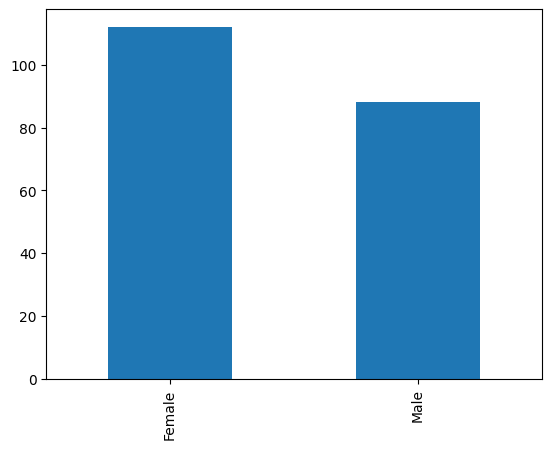

In [51]:
data['Gender'].value_counts().plot.bar()

<Axes: xlabel='Gender', ylabel='Spending Score (1-100)'>

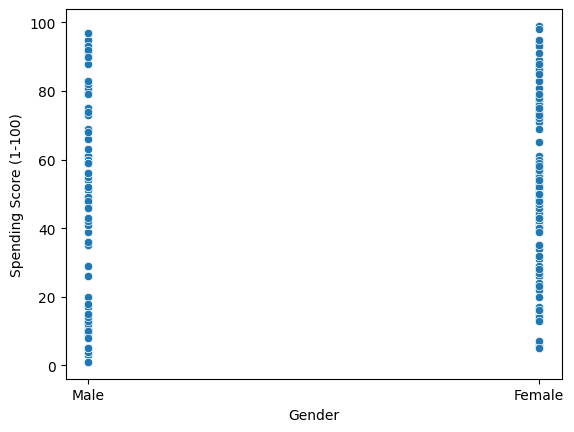

In [52]:
sns.scatterplot(x='Gender', y='Spending Score (1-100)', data=data)

We observe that females have more spending score when compared to that of the males.

<Axes: xlabel='Age', ylabel='Spending Score (1-100)'>

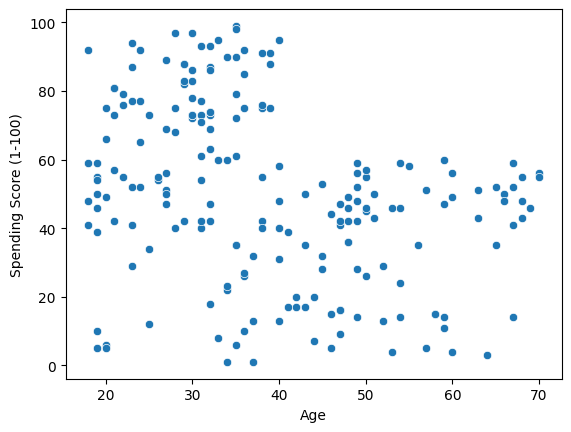

In [53]:
sns.scatterplot(x = 'Age', y = 'Spending Score (1-100)', data = data)

We observe that spending score is much higher for people between the age group 20 and 40.

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

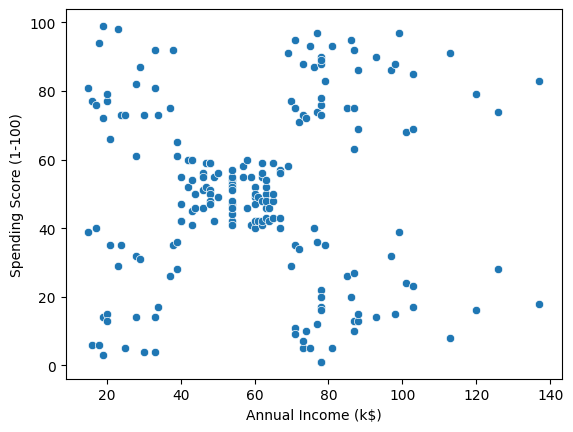

In [54]:
sns.scatterplot(x = 'Annual Income (k$)', y = 'Spending Score (1-100)', data = data)

We observe that there is a definite pattern for spending score for the annual income range between 40k and 60k.

In [55]:
#Choose the independent variables
X = data.iloc[:, 3:5].values
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

### **Find the k-value**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

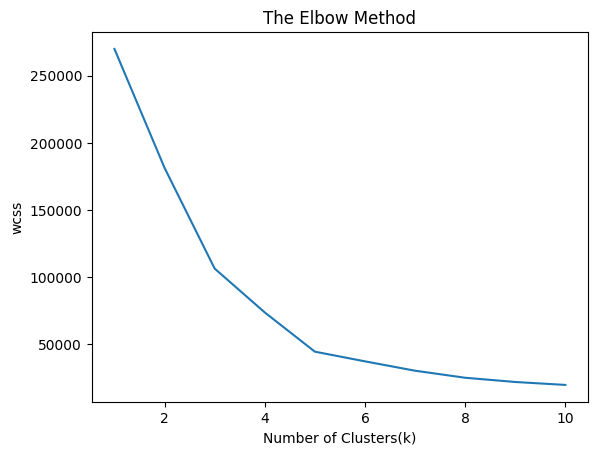

In [56]:
#Finding the optimal number of clusters using elbow method
#Initializing the list for the values of WCSS(Within-Cluster Sum of Square)
wcss =[]

#Using for loop for iterations from 1 to 10.
for i in range(1,11):
  kmeans = KMeans(n_clusters = i, init ='k-means++', random_state=42)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters(k)')
plt.ylabel('wcss')
plt.show()

In [57]:
wcss

[269981.28,
 181363.59595959593,
 106348.37306211122,
 73679.78903948836,
 44448.4554479337,
 37233.814510710006,
 30259.65720728547,
 25011.839349156588,
 21862.092672182895,
 19672.072849014323]

The point at which the elbow shape is created is 5; that is, our K value or an optimal number of clusters is 5. Now let’s train the model on the input data with a number of clusters 5.

### **Training and Evaluation**

In [58]:
#Training the Model
kmeans = KMeans(n_clusters = 5, init ='k-means++', random_state= 42)
#predicted output
y_kmeans = kmeans.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [59]:
y_kmeans

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4], dtype=int32)

In [60]:
#Build a new column in dataframe
data[['Clusters']] =pd.DataFrame(y_kmeans)

In [61]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Clusters
0,1,Male,19,15,39,2
1,2,Male,21,15,81,3
2,3,Female,20,16,6,2
3,4,Female,23,16,77,3
4,5,Female,31,17,40,2


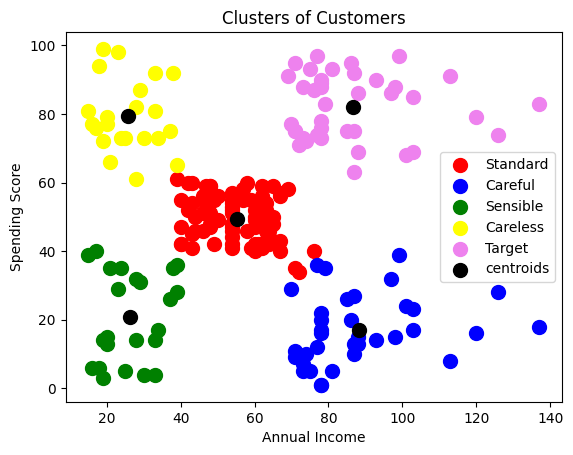

In [62]:
#Plot the clusters

plt.scatter(X[y_kmeans == 0,0], X[y_kmeans == 0,1], s=100, c= 'red', label='Standard')
plt.scatter(X[y_kmeans == 1,0], X[y_kmeans == 1,1], s=100, c= 'blue', label='Careful')
plt.scatter(X[y_kmeans == 2,0], X[y_kmeans == 2,1], s=100, c= 'green', label='Sensible')
plt.scatter(X[y_kmeans == 3,0], X[y_kmeans == 3,1], s=100, c= 'yellow', label='Careless')
plt.scatter(X[y_kmeans == 4,0], X[y_kmeans == 4,1], s=100, c= 'violet', label='Target')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c= 'black', label='centroids')

plt.title('Clusters of Customers')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

we observe 5 clusters based on the customers annual income and their spending score. we can classify these clusters of customers as Careful, Standard, Target, Sensible and Careless people.

### **Prediction**

In [63]:
#Prediction of new datapoints
Labels = ['Standard', 'Careful', 'Sensible', 'Careless', 'Target']
cluster = kmeans.predict([[23,76],[34,67],[12,45],[55,75],[75,96]])
print(cluster)
print(Labels[cluster[0]],Labels[cluster[1]],Labels[cluster[2]],Labels[cluster[3]],Labels[cluster[4]])

[3 3 2 0 4]
Careless Careless Sensible Standard Target
